<a href="https://colab.research.google.com/github/imji0319/PDSH/blob/master/PCA_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
iris = load_iris()

#넘파일 데이터 세트를 판다스 dataframe 으로 변환 
columns = ['sepal_length',  'sepal_width',  'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


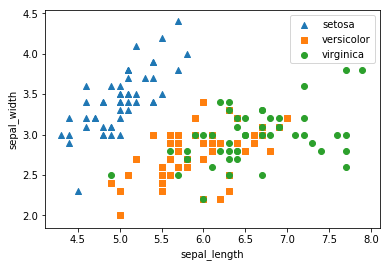

In [4]:
# sepal_length 와 sepal_width 를 X축, Y축으로 한 분포도

markers = [ '^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target'] == i]['sepal_length']
    y_axis_data = irisDF[irisDF['target'] == i]['sepal_width']
    plt.scatter(  x_axis_data,  y_axis_data, marker = marker, label = iris.target_names[i] )
    
    
plt. legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()
    

In [5]:
#PCA 는 여러 속성 값을 연산해야 함으로 속성의 스케일에 영향을 받음 -> 각 속성값을 동일한 스케일로 변환하는 것을 필요

from sklearn.preprocessing import StandardScaler
iris_scaled = StandardScaler().fit_transform(irisDF)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [6]:
from  sklearn.decomposition import PCA

pca = PCA(n_components = 2 ) #n_components = 변환할 차원의 수

#fit()과 transform() 을 호출해 PCA 변환 데이터 반환 

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)


(150, 2)


In [9]:
columns = [ 'pca_components_1', 'pca_components_2']

iris_pcaDF = pd.DataFrame(iris_pca, columns = columns)
iris_pcaDF['target'] = iris.target
iris_pcaDF.head(3)

,pca_components_1,pca_components_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0


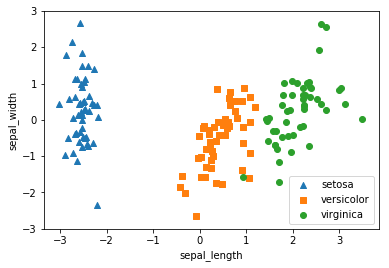

In [10]:
# PCA로 변환한 데이터 세트를 2차원 상에 시각화
# pca_components_1 을 X축으로 pca_components_2 을 Y축

markers = [ '^', 's', 'o']


for i, marker in enumerate(markers):
    x_axis_data = iris_pcaDF[iris_pcaDF['target'] == i]['pca_components_1']
    y_axis_data = iris_pcaDF[iris_pcaDF['target'] == i]['pca_components_2']
    plt.scatter(  x_axis_data,  y_axis_data, marker = marker, label = iris.target_names[i] )
    
    
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()


In [12]:
print(pca.explained_variance_ratio_)

[0.76740358 0.18282727]


### 원본 데이터와 PCA 변환 데이터의 분류 예측 비교

Esimator : RandomForestClassifier

In [14]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# 원본 데이터
rcf = RandomForestClassifier(random_state = 156)
scores = cross_val_score(rcf , iris.data, iris.target, scoring = 'accuracy', cv = 3 )
print(scores)

[0.98039216 0.92156863 0.97916667]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [16]:
# PCA 변환 데이터 
pca_X = iris_pcaDF[['pca_components_1', 'pca_components_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv = 3 )
print(scores_pca)

[0.96078431 1.         1.        ]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
